In [8]:
import pandas as pd

df_users = pd.read_csv('usersAllFriends.csv')
df_reviews = pd.read_csv('review.csv')
df_business = pd.read_csv('business.csv')

In [11]:
df_users.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [12]:
import pandas as pd
import plotly.express as px

df_5_star_businesses = df_business[df_business['stars'] == 5]
top_5_star_businesses = df_5_star_businesses.sort_values(by='review_count', ascending=False).head(20)

fig = px.bar(
    top_5_star_businesses,
    x='name',
    y='review_count',
    title='Top 5-Star Businesses by Review Count',
    labels={'name': 'Business Name', 'review_count': 'Review Count'},
    text='review_count'
)
fig.update_layout(
    xaxis_tickangle=45,
    xaxis_title="Business Name",
    yaxis_title="Review Count",
    height=600,
    width=1000
)
fig.show()

In [18]:
top_5_star_businesses

business_id = "_aKr7POnacW_VizRKBpCiA"

df_reviews[df_reviews['business_id'] == business_id]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
54,LRzTcokZgQJtYCnGsS5psw,JRXbWVcU-uugX2DATU3nRA,_aKr7POnacW_VizRKBpCiA,5,9,3,8,I think I owe an update because I am now a wee...,2013-12-09 15:06:06
72,y1ap6IraCmZ3kcM7VsTbgA,iPkdNziqnhNukjnmsrSzmg,_aKr7POnacW_VizRKBpCiA,5,9,2,3,After being prodded to join a fellow Yelper on...,2009-10-22 12:07:50
688,kaw0-eo54v--wbsOZsT1Ng,RJm5qxSw1Ct5VNrEOg1h_g,_aKr7POnacW_VizRKBpCiA,5,15,5,9,A really cool sandwich shop that's small in si...,2017-10-16 20:12:28
1255,s1GXqy3gDlwkNslGCYSlyw,xYgdYioZpHUxApiddFhCxg,_aKr7POnacW_VizRKBpCiA,2,9,4,5,I brought Husband and Friend of Teen here for ...,2014-02-17 17:55:47
1980,NKSO6HPUgp9809sCNKnIjQ,nr35WjC-YI0dFcsnW33Szw,_aKr7POnacW_VizRKBpCiA,5,10,4,7,"So, it's just a sandwich shop - why the hype? ...",2017-04-14 12:55:20
2471,5tliAyxQf7OKMbEWQykZrQ,bYENop4BuQepBjM1-BI3fA,_aKr7POnacW_VizRKBpCiA,5,12,4,9,"BCD - I'm bumping you up to a 5 Star rating, i...",2016-03-23 14:04:06
2488,81ItdH3rF700jlxjXm2A7g,bYENop4BuQepBjM1-BI3fA,_aKr7POnacW_VizRKBpCiA,4,11,3,8,Patience is a virtue and it is one that I do n...,2011-11-20 19:39:33
2617,pE39Jnk9_j5uBj4YZaUuZw,417svAEVHreK6c3SK4M8Tw,_aKr7POnacW_VizRKBpCiA,5,13,8,12,Okay last night I saw a picture of the spicy b...,2020-03-11 18:53:54
4982,a0gssPAwqvx2quGXz9EOvQ,Yj4SpqG0OJxbg8L1Qsrlsw,_aKr7POnacW_VizRKBpCiA,5,13,4,7,Now this is the place to buy a sandwich. I wa...,2016-10-16 14:28:24
5051,SCJ9ly0syDNV9saolmcoSQ,lMY8NBPyzlPbbu-KBYfD9A,_aKr7POnacW_VizRKBpCiA,3,26,13,20,Service is excellent! Decor is reflective of i...,2020-08-22 03:49:03


In [13]:
import pandas as pd
import plotly.express as px

df_5_star_businesses = df_business[df_business['stars'] == 5]
top_5_star_businesses = df_5_star_businesses.sort_values(by='review_count', ascending=False).head(20)

fig = px.bar(
    top_5_star_businesses,
    x='city',
    y='review_count',
    color='state',
    title='Top 5-Star Businesses by City and State',
    labels={'city': 'City', 'review_count': 'Review Count', 'state': 'State'},
    text='review_count'
)
fig.update_layout(
    xaxis_tickangle=45,
    xaxis_title="City",
    yaxis_title="Review Count",
    height=600,
    width=1000
)
fig.show()

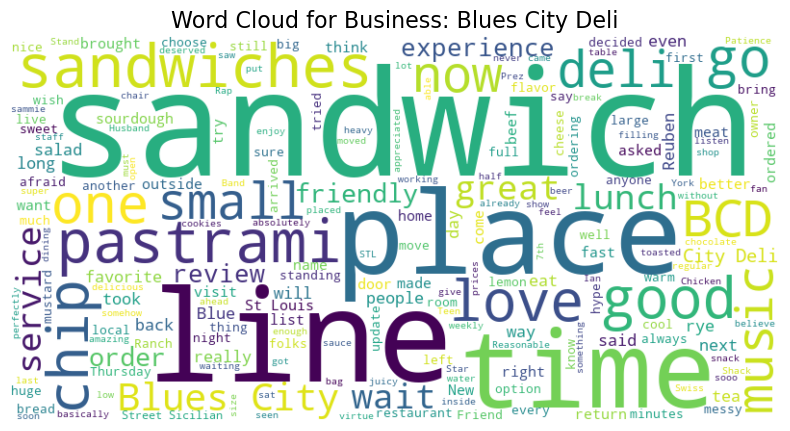

In [21]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

business_id = "_aKr7POnacW_VizRKBpCiA"
business_name = df_business[df_business['business_id'] == business_id]['name'].values[0]
business_reviews = df_reviews[df_reviews['business_id'] == business_id]

text_data = " ".join(business_reviews['text'].dropna().tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Word Cloud for Business: {business_name}", fontsize=16)
plt.show()

In [22]:
top_users = df_users.sort_values(by='fans', ascending=False).head(20)

fig = px.bar(
    top_users,
    x='name',
    y='fans',
    title='Top 20 Most Popular Users by Fans',
    labels={'name': 'User Name', 'fans': 'Number of Fans'},
    text='fans'
)
fig.update_layout(
    xaxis_tickangle=45,
    xaxis_title="User Name",
    yaxis_title="Number of Fans",
    height=600,
    width=1000
)
fig.show()